<a href="https://colab.research.google.com/github/ShreyaTripathi1/AudioLens/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

  Using cached ultralytics-8.3.74-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.m

In [ ]:
pip install transformers

In [ ]:
pip install gTTS

In [ ]:
pip install opencv-python

In [ ]:
# Import required libraries
import cv2
from ultralytics import YOLO
import numpy as np
from transformers import pipeline
from gtts import gTTS
import IPython.display as ipd
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
# Load YOLOv8 model
model = YOLO("yolov8x.pt")

# NLP Model (Hugging Face)
nlp = pipeline("text2text-generation", model="facebook/bart-large-cnn")

# Object-specific variables
FOCAL_LENGTH = 450  # Camera focal length
REAL_WIDTH = 4  # Real-world width of object in cm

# Constants for OpenCV
FONT = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.6
COLOR = (0, 255, 0)  # Green color for text
THICKNESS = 2

100%|██████████| 131M/131M [00:07<00:00, 17.1MB/s]
Device set to use cpu


In [ ]:
# Function to calculate distance
def calculate_distance(bbox_width, focal_length=FOCAL_LENGTH, real_width=REAL_WIDTH):
    return (real_width * focal_length) / bbox_width if bbox_width > 0 else 0

# Function to generate a description using NLP
def generate_description(detections):
    if not detections:
        return "No objects detected."
    objects = [f"A {name} is approximately {round(distance, 2)} centimeters away." for name, distance in detections]
    input_text = " ".join(objects)
    try:
        summary = nlp(input_text, max_length=50, do_sample=False)[0]["generated_text"]
        return summary
    except Exception as e:
        print("NLP model error:", e)
        return input_text  # Fallback text if NLP fails

# Function for text-to-speech using gTTS
def text_to_speech(text):
    print("Speaking:", text)
    tts = gTTS(text=text, lang="en")
    tts.save("output.mp3")
    ipd.display(ipd.Audio("output.mp3"))

# JavaScript-based webcam capture
def take_photo(filename="photo.jpg", quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js(f'takePhoto({quality})')
    binary = b64decode(data.split(",")[1])
    with open(filename, "wb") as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg

0: 480x640 4 persons, 1 bicycle, 3 cars, 1 traffic light, 1 tv, 4592.3ms
Speed: 7.1ms preprocess, 4592.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Detected: car, Distance: 36.00 cm, Position: Center-Center
Detected: traffic light, Distance: 27.27 cm, Position: Right-Center
Detected: person, Distance: 42.86 cm, Position: Left-Center
Detected: bicycle, Distance: 21.43 cm, Position: Left-Bottom
Detected: car, Distance: 60.00 cm, Position: Center-Center
Detected: person, Distance: 163.64 cm, Position: Left-Center
Detected: car, Distance: 90.00 cm, Position: Center-Center
Detected: person, Distance: 128.57 cm, Position: Left-Center
Detected: person, Distance: 105.88 cm, Position: Left-Center
Detected: tv, Distance: 2.83 cm, Position: Center-Bottom


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (50). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


Description: A car is approximately 36.0 centimeters away. A person is approximately 163.64 centimeters. A traffic light is approximately 27.27 centimeters close. A tv is approximately 2.83 centimeters away from a person. A car is
Speaking: A car is approximately 36.0 centimeters away. A person is approximately 163.64 centimeters. A traffic light is approximately 27.27 centimeters close. A tv is approximately 2.83 centimeters away from a person. A car is


Processed image saved as output_detected.jpg


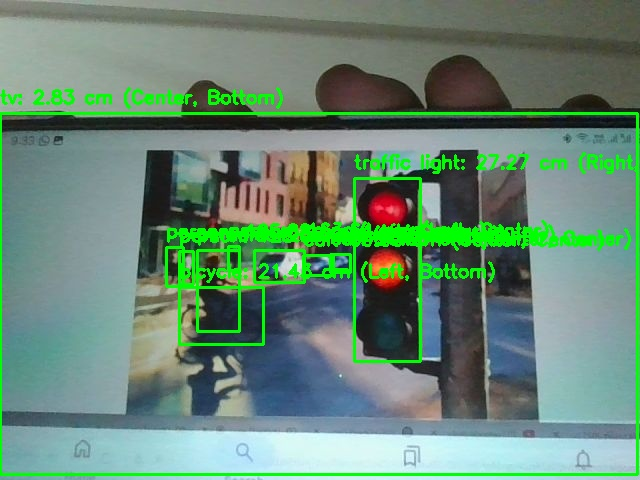

In [ ]:
# Capture image from webcam
try:
    filename = take_photo()
    print(f"Saved to {filename}")

    # Load the image for processing
    frame = cv2.imread(filename)
    frame_height, frame_width, _ = frame.shape
    center_x_frame, center_y_frame = frame_width // 2, frame_height // 2

    # Run YOLO detection
    results = model(frame)

    detected_objects = []
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        bbox_width = x2 - x1
        distance = calculate_distance(bbox_width)

        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        detected_objects.append((class_name, distance))

        obj_center_x = (x1 + x2) // 2
        obj_center_y = (y1 + y2) // 2

        direction_x = "Center"
        direction_y = "Center"

        if obj_center_x < center_x_frame - 50:
            direction_x = "Left"
        elif obj_center_x > center_x_frame + 50:
            direction_x = "Right"
        if obj_center_y < center_y_frame - 50:
            direction_y = "Top"
        elif obj_center_y > center_y_frame + 50:
            direction_y = "Bottom"

        print(f"Detected: {class_name}, Distance: {distance:.2f} cm, Position: {direction_x}-{direction_y}")

        # Draw bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), COLOR, 2)
        label = f"{class_name}: {distance:.2f} cm ({direction_x}, {direction_y})"
        cv2.putText(frame, label, (x1, y1 - 10), FONT, FONT_SCALE, COLOR, THICKNESS)

    # Generate and play description
    if detected_objects:
        description = generate_description(detected_objects)
        print("Description:", description)
        text_to_speech(description)

    # Save the output image with bounding boxes
    output_filename = "output_detected.jpg"
    cv2.imwrite(output_filename, frame)
    print(f"Processed image saved as {output_filename}")

    # Display the processed image
    from IPython.display import Image
    display(Image(output_filename))

except Exception as e:
    print("Error:", e)